In [1]:
!apt-get install -y r-base
!pip install rpy2
%load_ext rpy2.ipython

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Paso 2: Cargar los Datos

In [4]:
%%R

install.packages('tidyverse')
library(tidyverse)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpLH9waV/downloaded_packages’



In [5]:
%%R

# Importar bibliotecas necesarias
library(tidyverse)
# Cargar datos desde un archivo CSV
df <- read_csv('medical_examination.csv')
# Mostrar las primeras filas del dataframe
print(head(df))

Rows: 70000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 13
     id   age gender height weight ap_hi ap_lo cholesterol  gluc smoke  alco
  <dbl> <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>       <dbl> <dbl> <dbl> <dbl>
1     0 18393      2    168     62   110    80           1     1     0     0
2     1 20228      1    156     85   140    90           3     1     0     0
3     2 18857      1    165     64   130    70           3     1     0     0
4     3 17623      2    169     82   150   100           1     1     0     0
5     4 17474      1    156     56   100    60           1     1     0     0
6     8 21914      1    151     67   120    80           2     2     0     0
# ℹ 2 more

In [6]:
%%R

# Importar bibliotecas necesarias
library(tidyverse)
# Cargar datos desde un archivo CSV
df <- read_csv('medical_examination.csv')

df$age <- df$age / 365.25  # Divide por el promedio de días por año

# Opcional: redondear la edad a un número entero
df$age <- round(df$age)

# Mostrar las primeras filas del dataframe
print(head(df))


Rows: 70000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 13
     id   age gender height weight ap_hi ap_lo cholesterol  gluc smoke  alco
  <dbl> <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>       <dbl> <dbl> <dbl> <dbl>
1     0    50      2    168     62   110    80           1     1     0     0
2     1    55      1    156     85   140    90           3     1     0     0
3     2    52      1    165     64   130    70           3     1     0     0
4     3    48      2    169     82   150   100           1     1     0     0
5     4    48      1    156     56   100    60           1     1     0     0
6     8    60      1    151     67   120    80           2     2     0     0
# ℹ 2 more

Paso 3: Limpiar los Datos

In [9]:
%%R

df <- df %>%
  mutate(across(where(is.numeric), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))

# Eliminar registros duplicados
df <- df[!duplicated(df), ]

Paso 4: Análisis Exploratorio de Datos (EDA)

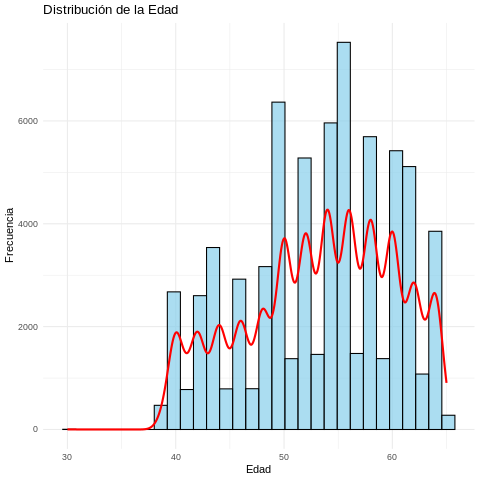

In [42]:
%%R

# Cargar paquetes necesarios
library(dplyr)
library(ggplot2)

# Descripción estadística del dataframe
summary(df)

# Distribución de la edad
ggplot(df, aes(x = age)) +
  geom_histogram(bins = 30, color = "black", fill = "skyblue", alpha = 0.7) +
  geom_density(aes(y = ..count..), color = "red", size = 1) +
  ggtitle("Distribución de la Edad") +
  xlab("Edad") +
  ylab("Frecuencia") +
  theme_minimal()

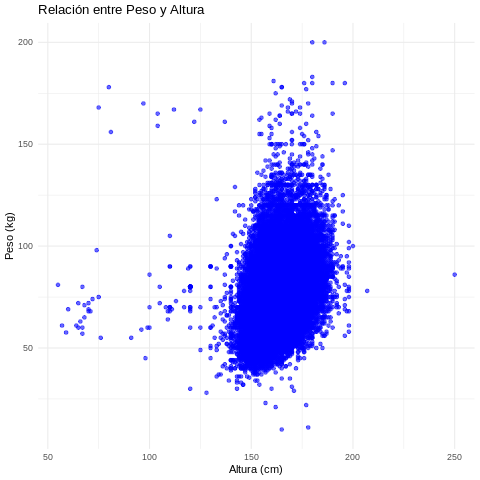

In [41]:
%%R

# Cargar paquetes necesarios
library(dplyr)
library(ggplot2)

# Descripción estadística del dataframe
summary(df)

# Relación entre peso y altura
ggplot(df, aes(x = height, y = weight)) +
  geom_point(color = "blue", alpha = 0.6) +
  ggtitle("Relación entre Peso y Altura") +
  xlab("Altura (cm)") +
  ylab("Peso (kg)") +
  theme_minimal()

Paso 5: Análisis de Correlación

In [12]:
%%R

install.packages("reshape2")

(as ‘lib’ is unspecified)














	‘/tmp/RtmpLH9waV/downloaded_packages’



Attaching package: ‘reshape2’



    smiths




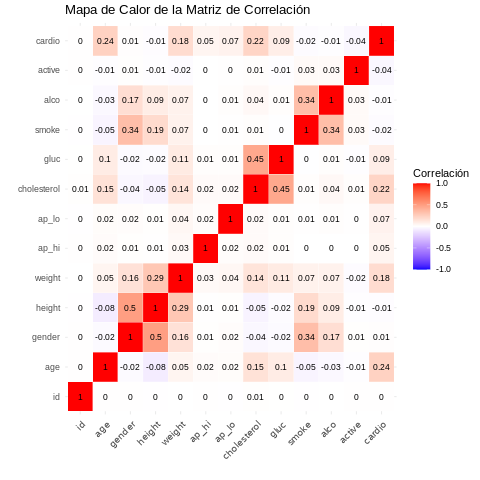

In [13]:
%%R

# Cargar paquetes necesarios
library(ggplot2)
library(reshape2)

# Matriz de correlación
corr_matrix <- cor(df, use = "complete.obs")

# Convertir la matriz de correlación en un formato largo para ggplot2
melted_corr_matrix <- melt(corr_matrix)

# Mapa de calor de la matriz de correlación
ggplot(data = melted_corr_matrix, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1, 1), space = "Lab",
                       name="Correlación") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 3) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,
                                   size = 10, hjust = 1)) +
  labs(title = "Mapa de Calor de la Matriz de Correlación",
       x = "", y = "")


Paso 6: Visualización de Datos Médicos

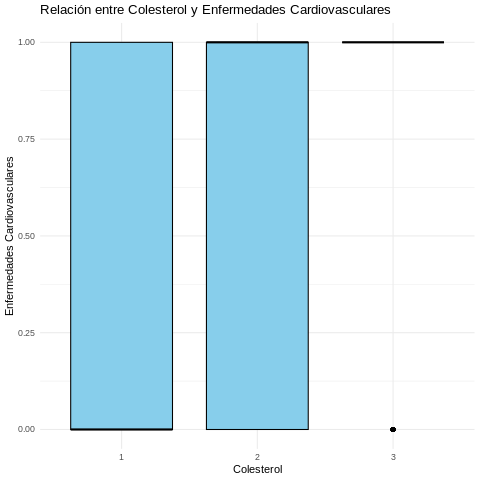

In [37]:
%%R

# Cargar paquete necesario
library(ggplot2)

# Relación entre colesterol y enfermedades cardiovasculares
ggplot(df, aes(x = factor(cholesterol), y = cardio)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  ggtitle("Relación entre Colesterol y Enfermedades Cardiovasculares") +
  xlab("Colesterol") +
  ylab("Enfermedades Cardiovasculares") +
  theme_minimal()

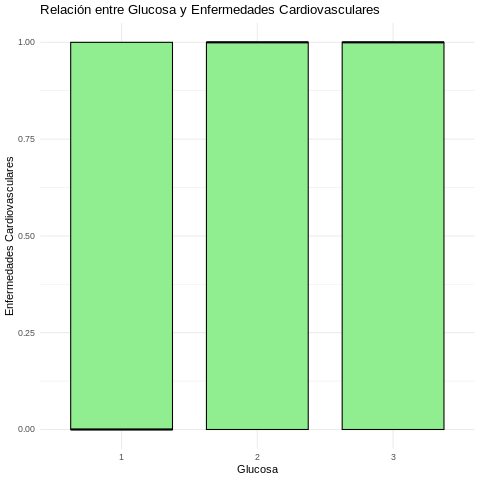

In [38]:
%%R

# Relación entre glucosa y enfermedades cardiovasculares
ggplot(df, aes(x = factor(gluc), y = cardio)) +
  geom_boxplot(fill = "lightgreen", color = "black") +
  ggtitle("Relación entre Glucosa y Enfermedades Cardiovasculares") +
  xlab("Glucosa") +
  ylab("Enfermedades Cardiovasculares") +
  theme_minimal()

Paso 7: Agregados

In [17]:
%%R

# Conteo de Hombre y Mujeres
conteo_genero <- table(df$gender)
print(conteo_genero)

hombres <- conte_genero[1]
mujeres <- conteo_genero[2]
otros <- conteo_genero[3]


    1     2     3 
45522 24467    11 


In [19]:
%%R

# Separar datos de mujeres
df_mujeres <- df[df$gender == 2, ]
print(df_mujeres)

# A tibble: 24,467 × 13
      id   age gender height weight ap_hi ap_lo cholesterol  gluc smoke  alco
   <dbl> <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>       <dbl> <dbl> <dbl> <dbl>
 1     0    50      2    168     62   110    80           1     1     0     0
 2     3    48      2    169     82   150   100           1     1     0     0
 3    12    62      2    178     95   130    90           3     3     0     0
 4    16    52      2    173     60   120    80           1     1     0     0
 5    18    40      2    165     60   120    80           1     1     0     0
 6    23    40      2    181     95   130    90           1     1     1     1
 7    24    46      2    172    112   120    80           1     1     0     0
 8    29    60      2    162     56   120    70           1     1     1     0
 9    30    54      2    163     83   120    80           1     1     0     0
10    33    64      2    156     45   110    60           1     1     0     0
# ℹ 24,457 more rows
# ℹ 2 more variable

In [20]:
%%R

# Separar datos de hombres
df_hombres <- df[df$gender == 1, ]
print(df_hombres)

# A tibble: 45,522 × 13
      id   age gender height weight ap_hi ap_lo cholesterol  gluc smoke  alco
   <dbl> <dbl>  <dbl>  <dbl>  <dbl> <dbl> <dbl>       <dbl> <dbl> <dbl> <dbl>
 1     1    55      1    156     85   140    90           3     1     0     0
 2     2    52      1    165     64   130    70           3     1     0     0
 3     4    48      1    156     56   100    60           1     1     0     0
 4     8    60      1    151     67   120    80           2     2     0     0
 5     9    61      1    157     93   130    80           3     1     0     0
 6    13    48      1    158     71   110    70           1     1     0     0
 7    14    54      1    164     68   110    60           1     1     0     0
 8    15    62      1    169     80   120    80           1     1     0     0
 9    21    54      1    158     78   110    70           1     1     0     0
10    25    58      1    170     75   130    70           1     1     0     0
# ℹ 45,512 more rows
# ℹ 2 more variable

In [21]:
%%R

# Media en Hombres
media_hombres <- colMeans(df_hombres, na.rm = TRUE)
print(media_hombres)

          id          age       gender       height       weight        ap_hi 
4.990281e+04 5.341617e+01 1.000000e+00 1.613562e+02 7.256590e+01 1.281398e+02 
       ap_lo  cholesterol         gluc        smoke         alco       active 
9.452511e+01 1.384737e+00 1.235095e+00 1.785950e-02 2.550415e-02 8.020078e-01 
      cardio 
4.967488e-01 


In [22]:
%%R

# Función para calcular la moda en R
moda <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

# Moda en Hombres
moda_hombres <- sapply(df_hombres, moda)
print(moda_hombres)

         id         age      gender      height      weight       ap_hi 
          1          56           1         165          65         120 
      ap_lo cholesterol        gluc       smoke        alco      active 
         80           1           1           0           0           1 
     cardio 
          0 


In [23]:
%%R

# Mediana en Hombres
mediana_hombres <- apply(df_hombres, 2, median, na.rm = TRUE)
print(mediana_hombres)

         id         age      gender      height      weight       ap_hi 
    50006.5        54.0         1.0       161.0        70.0       120.0 
      ap_lo cholesterol        gluc       smoke        alco      active 
       80.0         1.0         1.0         0.0         0.0         1.0 
     cardio 
        0.0 


In [24]:
%%R

# Media de Mujeres
media_mujeres <- colMeans(df_mujeres, na.rm = TRUE)
print(media_mujeres)

          id          age       gender       height       weight        ap_hi 
5.010720e+04 5.309216e+01 2.000000e+00 1.699485e+02 7.725856e+01 1.300797e+02 
       ap_lo  cholesterol         gluc        smoke         alco       active 
1.005541e+02 1.333674e+00 1.210488e+00 2.189071e-01 1.063882e-01 8.068827e-01 
      cardio 
5.052520e-01 


In [26]:
%%R

# Función para calcular la moda en R
moda <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

# Moda de Mujeres
moda_mujeres <- sapply(df_mujeres, moda)
print(moda_mujeres)

         id         age      gender      height      weight       ap_hi 
          0          58           2         170          70         120 
      ap_lo cholesterol        gluc       smoke        alco      active 
         80           1           1           0           0           1 
     cardio 
          1 


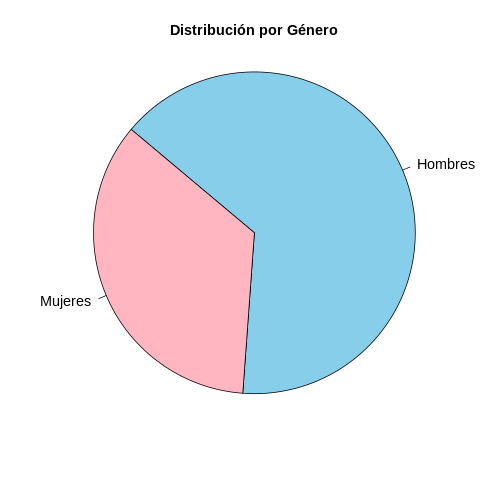

In [36]:
%%R

# Conteo de Hombre y Mujeres
conteo_genero <- table(df$gender)

# Asignando los valores a variables
hombres <- conteo_genero[1]
mujeres <- conteo_genero[2]
otros <- conteo_genero[3]

# Datos para el gráfico
sizes <- c(hombres, mujeres)
labels <- c("Hombres", "Mujeres")
colors <- c("skyblue", "lightpink", "lightgreen")

# Gráfico de pastel
pie(sizes, labels = labels, col = colors, main = "Distribución por Género",
    clockwise = TRUE, radius = 1, init.angle = 140,
    cex = 1.2, col.main = "black")

# Mostrar el gráfico

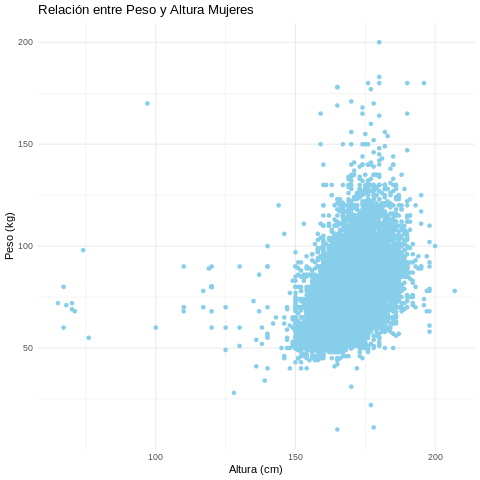

In [43]:
%%R

# Cargar el paquete ggplot2
library(ggplot2)

# Relación entre peso y altura de Mujeres
ggplot(df_mujeres, aes(x = height, y = weight)) +
  geom_point(color = "skyblue") + # Puntos de dispersión
  ggtitle("Relación entre Peso y Altura Mujeres") + # Título
  xlab("Altura (cm)") + # Etiqueta eje X
  ylab("Peso (kg)") + # Etiqueta eje Y
  theme_minimal() # Estilo limpio

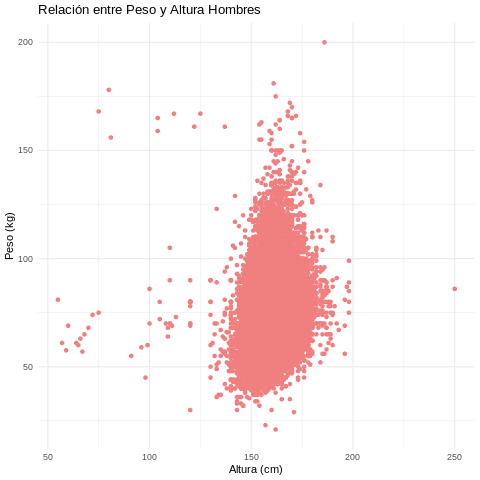

In [44]:
%%R

# Cargar el paquete ggplot2
library(ggplot2)

# Relación entre peso y altura de Hombres
ggplot(df_hombres, aes(x = height, y = weight)) +
  geom_point(color = "lightcoral") + # Puntos de dispersión con color
  ggtitle("Relación entre Peso y Altura Hombres") + # Título
  xlab("Altura (cm)") + # Etiqueta eje X
  ylab("Peso (kg)") + # Etiqueta eje Y
  theme_minimal() # Estilo limpio


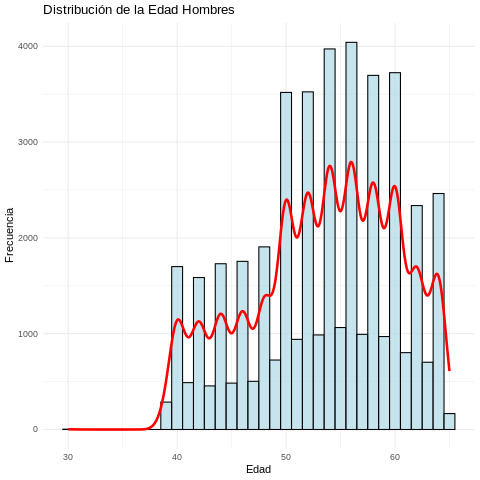

In [53]:
%%R

# Cargar el paquete ggplot2
library(ggplot2)

# Distribución de la Edad de Hombres
ggplot(df_hombres, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black", alpha = 0.7) + # Histograma
  geom_density(aes(y = ..count..), color = "red", lwd = 1.2) + # Curva de densidad
  ggtitle("Distribución de la Edad Hombres") + # Título
  xlab("Edad") + # Etiqueta eje X
  ylab("Frecuencia") + # Etiqueta eje Y
  theme_minimal() # Estilo limpio

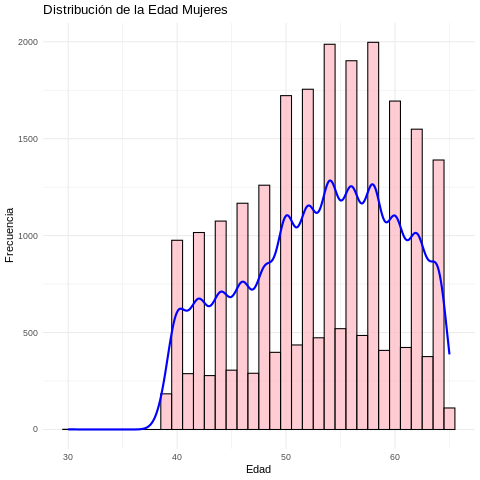

In [52]:
%%R

library(dplyr)
# Cargar el paquete ggplot2
library(ggplot2)

summary(df_mujeres)

# Distribución de la Edad de Mujeres
ggplot(df_mujeres, aes(x = age)) +
  geom_histogram(binwidth = 1, fill = "lightpink", color = "black", alpha = 0.7) + # Histograma
  geom_density(aes(y = ..count..), color = "blue", size = 1) + # Curva de densidad
  ggtitle("Distribución de la Edad Mujeres") + # Título
  xlab("Edad") + # Etiqueta eje X
  ylab("Frecuencia") + # Etiqueta eje Y
  theme_minimal() # Estilo limpio